# 上机练习题1

max_fitness: 38.85029241061738
最优的基因型： [1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0]
(x, y): (11.625531103252804, 5.725031281472213)
maxF =  38.85029241061738


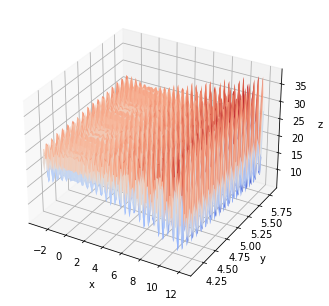

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

DNA_SIZE = 33
X_SIZE = 18
Y_SIZE = 15
POP_SIZE = 100
ELITE_RETENTION_SIZE = 5
CROSSOVER_RATE = 0.6
MUTATION_RATE = 0.01

N_GENERATIONS = 1000    #代数

X_BOUND = [-3.0, 12.1]
Y_BOUND = [4.1, 5.8]

def F(x, y):
    return 21.5 + x * np.sin(4 * np.pi * x) + y * np.sin(20 * np.pi * y)

def plot_3d(ax):
    X = np.linspace(*X_BOUND, 100)
    Y = np.linspace(*Y_BOUND, 100)
    X, Y = np.meshgrid(X, Y)
    Z = F(X, Y)
    ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

def get_fitness(pop): 
    x,y = translateDNA(pop)
    pred = F(x, y)
    return pred #(pred - np.min(pred)) + 1e-3 #减去最小的适应度是为了防止适应度出现负数，通过这一步fitness的范围为[0, np.max(pred)-np.min(pred)],最后在加上一个很小的数防止出现为0的适应度


def translateDNA(pop): #pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目
    x_pop = pop[:,:X_SIZE]#表示X
    y_pop = pop[:,X_SIZE:] #表示y
    
    x = x_pop.dot(2**np.arange(X_SIZE)[::-1])/float(2**X_SIZE-1)*(X_BOUND[1]-X_BOUND[0])+X_BOUND[0]
    y = y_pop.dot(2**np.arange(Y_SIZE)[::-1])/float(2**Y_SIZE-1)*(Y_BOUND[1]-Y_BOUND[0])+Y_BOUND[0]
    return x,y

def crossover(pop, CROSSOVER_RATE):
    new_pop = []
    for i in range(pop.shape[0]//2):
        father = pop[i * 2]
        mother = pop[i * 2 + 1]
        child1 = father
        child2 = mother
        if np.random.rand() < CROSSOVER_RATE:       #产生子代时不是必然发生交叉，而是以一定的概率发生交叉
            cross_points = np.sort(np.random.randint(low=0, high=20,size=2))    #随机产生交叉的点
            child1[cross_points[0]:cross_points[1]] = mother[cross_points[0]:cross_points[1]]
            child2[cross_points[0]:cross_points[1]] = father[cross_points[0]:cross_points[1]]
            new_pop.append(child1)
            new_pop.append(child2)
    return new_pop

def mutation(child, MUTATION_RATE):
    return np.where(np.random.rand(child.shape[0], child.shape[1]) < MUTATION_RATE, child^1, child)

def elite_retention(pop, fitness, size):
    retention = []
    for i in range(size):
        max_fitness_index = np.argmax(fitness)
        retention.append(pop[max_fitness_index])
        pop = np.delete(pop, max_fitness_index, axis = 0)
        fitness = np.delete(fitness, max_fitness_index)
    return np.array(retention), pop, fitness
    
    
def select(pop, fitness, elite_retention_size):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(pop.shape[0]), size=POP_SIZE - elite_retention_size, replace=True, p=(fitness)/(fitness.sum()) )
    return pop[idx]

def print_info(pop):
    fitness = get_fitness(pop)
    max_fitness_index = np.argmax(fitness)
    print("max_fitness:", fitness[max_fitness_index])
    x,y = translateDNA(pop)
    print("最优的基因型：", pop[max_fitness_index])
    print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))
    print('maxF = ',F(x[max_fitness_index], y[max_fitness_index]))


if __name__ == "__main__":
    fig = plt.figure()
    ax = Axes3D(fig)    

    pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE)) #matrix (POP_SIZE, DNA_SIZE)
    
    fitness = get_fitness(pop)
    pop = select(pop, fitness, 0) #选择生成新的种群
    
    for _ in range(N_GENERATIONS):
        new_pop = np.array(crossover(pop, CROSSOVER_RATE))
        new_pop = mutation(new_pop, MUTATION_RATE)
        pop  = np.append(pop, new_pop, axis = 0)
        fitness = get_fitness(pop)
        retention, pop, fitness = elite_retention(pop, fitness, ELITE_RETENTION_SIZE)
        pop = select(pop, fitness, ELITE_RETENTION_SIZE) #选择生成新的种群
        pop = np.append(pop, retention, axis = 0)
    
    print_info(pop)
    plot_3d(ax)

# 上机练习题2

max_fitness: 3897.7342268415996
最优的基因型： [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
(x, y): (2.048, -2.048)
maxF =  3897.7342268415996


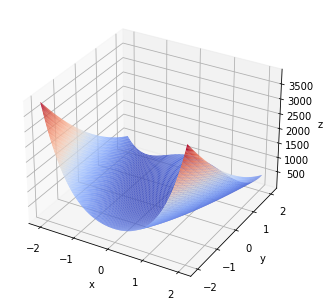

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

DNA_SIZE = 20
X_SIZE = 10
Y_SIZE = 10
POP_SIZE = 100
ELITE_RETENTION_SIZE = 5
CROSSOVER_RATE = 0.6
MUTATION_RATE = 0.01

N_GENERATIONS = 1000    #代数

X_BOUND = [-2.048, 2.048]
Y_BOUND = [-2.048, 2.048]

def F(x, y):
    return 100 * (y - x**2)**2 + (1-x)**2

def plot_3d(ax):
    X = np.linspace(*X_BOUND, 100)
    Y = np.linspace(*Y_BOUND, 100)
    X, Y = np.meshgrid(X, Y)
    Z = F(X, Y)
    ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

def get_fitness(pop): 
    x,y = translateDNA(pop)
    pred = F(x, y)
    return pred #(pred - np.min(pred)) + 1e-3 #减去最小的适应度是为了防止适应度出现负数，通过这一步fitness的范围为[0, np.max(pred)-np.min(pred)],最后在加上一个很小的数防止出现为0的适应度


def translateDNA(pop): #pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目
    x_pop = pop[:,:X_SIZE]#表示X
    y_pop = pop[:,X_SIZE:] #表示y
    
    x = x_pop.dot(2**np.arange(X_SIZE)[::-1])/float(2**X_SIZE-1)*(X_BOUND[1]-X_BOUND[0])+X_BOUND[0]
    y = y_pop.dot(2**np.arange(Y_SIZE)[::-1])/float(2**Y_SIZE-1)*(Y_BOUND[1]-Y_BOUND[0])+Y_BOUND[0]
    return x,y

def crossover(pop, CROSSOVER_RATE):
    new_pop = []
    for i in range(pop.shape[0]//2):
        father = pop[i * 2]
        mother = pop[i * 2 + 1]
        child1 = father
        child2 = mother
        if np.random.rand() < CROSSOVER_RATE:       #产生子代时不是必然发生交叉，而是以一定的概率发生交叉
            cross_points = np.sort(np.random.randint(low=0, high=20,size=2))    #随机产生交叉的点
            child1[cross_points[0]:cross_points[1]] = mother[cross_points[0]:cross_points[1]]
            child2[cross_points[0]:cross_points[1]] = father[cross_points[0]:cross_points[1]]
            new_pop.append(child1)
            new_pop.append(child2)
    return new_pop

def mutation(child, MUTATION_RATE):
    return np.where(np.random.rand(child.shape[0], child.shape[1]) < MUTATION_RATE, child^1, child)

def elite_retention(pop, fitness, size):
    retention = []
    for i in range(size):
        max_fitness_index = np.argmax(fitness)
        retention.append(pop[max_fitness_index])
        pop = np.delete(pop, max_fitness_index, axis = 0)
        fitness = np.delete(fitness, max_fitness_index)
    return np.array(retention), pop, fitness
    
    
def select(pop, fitness, elite_retention_size):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(pop.shape[0]), size=POP_SIZE - elite_retention_size, replace=True, p=(fitness)/(fitness.sum()) )
    return pop[idx]

def print_info(pop):
    fitness = get_fitness(pop)
    max_fitness_index = np.argmax(fitness)
    print("max_fitness:", fitness[max_fitness_index])
    x,y = translateDNA(pop)
    print("最优的基因型：", pop[max_fitness_index])
    print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))
    print('maxF = ',F(x[max_fitness_index], y[max_fitness_index]))


if __name__ == "__main__":
    fig = plt.figure()
    ax = Axes3D(fig)    
    #np.random.seed(0)

    pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE)) #matrix (POP_SIZE, DNA_SIZE)
    
    fitness = get_fitness(pop)
    pop = select(pop, fitness, 0) #选择生成新的种群
    
    for _ in range(N_GENERATIONS):
        new_pop = np.array(crossover(pop, CROSSOVER_RATE))
        new_pop = mutation(new_pop, MUTATION_RATE)
        pop  = np.append(pop, new_pop, axis = 0)
       # print("前",pop.shape)
        fitness = get_fitness(pop)
        retention, pop, fitness = elite_retention(pop, fitness, ELITE_RETENTION_SIZE)
        #print(pop.shape)
        pop = select(pop, fitness, ELITE_RETENTION_SIZE) #选择生成新的种群
        pop = np.append(pop, retention, axis = 0)
    
    print_info(pop)
    plot_3d(ax)